# 遗传算法

遗传算法（`Genetic Algorithm, GA`）是模拟达尔文生物进化论的自然选择和遗传学机理的生物进化过程的计算模型，是一种通过模拟自然进化过程搜索最优解的方法。遗传算法这一术语最早在1975年由`J. Holland`的学生`Kenneth De Jong`的博士论文论文中首次出现，该文对利用遗传算法用于优化做了系统和深入的研究。具体而言，他利用一组样本问题探索遗传算法的不同参数对优化性能的影响。

GA是一种随机全局搜索优化方法，它模拟了自然选择和遗传中发生的复制、交叉(`crossover`)和变异(`mutation`)等现象。从任一初始种群（`Population`）出发，通过**随机选择、交叉和变异**操作，产生一群更适合环境的个体，使群体进化到搜索空间中越来越好的区域，这样一代一代不断繁衍进化，最后收敛到一群最适应环境的个体（`Individual`），从而求得问题的近似最优解。

## 1. 遗传算法常用术语

遗传算法是由进化论和遗传学机理而产生的搜索算法，所以在这个算法中会用到一些生物遗传学知识，以下是一些术语：
- 染色体(Chromosome)：染色体又可称为基因型个体(individuals)，一定数量的个体组成了群体(population)，群体中个体的数量叫做群体大小（population size）。
- 位串(Bit String)：个体的表示形式。对应于遗传学中的染色体。
- 基因(Gene)：基因是染色体中的元素，用于表示个体的特征。例如有一个串（即染色体）S=1011，则其中的1，0，1，1这4个元素分别称为基因。
- 特征值( Feature)：在用串表示整数时，基因的特征值与二进制数的权一致；例如在串 S=1011 中，基因位置3中的1，它的基因特征值为2；基因位置1中的1，它的基因特征值为8。
- 适应度(Fitness)：各个个体对环境的适应程度叫做适应度(fitness)。为了体现染色体的适应能力，引入了对问题中的每一个染色体都能进行度量的函数，叫适应度函数。这个函数通常会被用来计算个体在群体中被使用的概率。
- 基因型(Genotype)：或称遗传型，是指基因组定义遗传特征和表现。对于于GA中的位串。
- 表现型(Phenotype)：生物体的基因型在特定环境下的表现特征。对应于GA中的位串解码后的参数。

## 2. 遗传算法的基本过程

基本遗传算法(也称标准遗传算法或简单遗传算法，Simple Genetic Algorithm，简称SGA)是一种群体型操作，该操作以群体中的所有个体为对象，只使用基本遗传算子(Genetic Operator)：**选择算子(Selection Operator)、交叉算子(Crossover Operator)和变异算子(Mutation Operator)** 。其遗传进化操作过程简单，容易理解，是其它一些遗传算法的基础，它不仅给各种遗传算法提供了一个基本框架，同时也具有一定的应用价值。选择、交叉和变异是遗传算法的3个主要操作算子，它们构成了遗传操作，使遗传算法具有了其它方法没有的特点。

该方法表示如下：

$SGA=(C,E,P_0,M,\phi,\Gamma,\Psi,T)$

其中，

$C$ 表示个体的编码方案

$E$ 表示个体适应度评价函数

$P_0$ 表示初始种群

$M$ 表示种群大小

$\phi$ 表示选择算子

$\Gamma$ 表示交叉算子

$\Psi$ 表示变异算子

$T$ 表示遗传算法终止条件

## 3. 遗传算法的步骤

### (1) 编码

解空间中的解在遗传算法中的表示形式。从问题的解(solution)到基因型的映射称为编码，即把一个问题的可行解从其解空间转换到遗传算法的搜索空间的转换方法。遗传算法在进行搜索之前先将解空间的解表示成遗传算法的基因型串(也就是染色体)结构数据，这些串结构数据的不同组合就构成了不同的点。

常见的编码方法有二进制编码、格雷码编码、 浮点数编码、各参数级联编码、多参数交叉编码等。

- 二进制编码：即组成染色体的基因序列是由二进制数表示，具有编码解码简单易用，交叉变异易于程序实现等特点。

- 格雷编码：两个相邻的数用格雷码表示，其对应的码位只有一个不相同，从而可以提高算法的局部搜索能力。这是格雷码相比二进制码而言所具备的优势。

- 浮点数编码：是指将个体范围映射到对应浮点数区间范围，精度可以随浮点数区间大小而改变。


**示例1**

设某一参数的取值范围为$[U_1, U_2]$，我们用长度为k的二进制编码符号来表示该参数，则它总共产生$2^k$种不同的编码，可使参数编码时的对应关系：

$$
b000000000 = 0 \rightarrow U_1\\
b000000001 = 1 \rightarrow U_1 + \delta\\
b000000010 = 2 \rightarrow U_1 +  2\cdot \delta\\
.\\
.\\
.\\
b11111111 = 2^k-1 \rightarrow U_2
$$

其中, $\delta=\frac{U_2}{U_1}$

### (2) 解码

$X = U_1 + (\sum_{i=1}^k b_i\cdot 2^{i-1})\frac{U_2-U_1}{2^k-1}$

其中，$X$为参数值，$b_i$为其对应编码。

In [1]:
def decode(b, k, u1, u2):
    return u1 + int(b, base=2) * (u2 - u1) / (2**k - 1)

In [2]:
int('111', base=2)

7

In [20]:
decode('11111111', k=8, u1=8, u2=10)

10.0

### (3) 初始群体的生成

设置最大进化代数$T$，群体大小$M$，交叉概率$P_c$，变异概率$P_m$，随机生成$M$个个体作为初始化群体$\mathrm{G(t=0)}$。

### (4) 适应度值评估检测

适应度函数表明个体或解的优劣性。对于不同的问题，适应度函数的定义方式不同。根据具体问题，计算群体$G(t)$中各个个体的适应度。

### (5) 遗传算子
**a.选择**

选择操作从旧群体中以一定概率选择优良个体组成新的种群，以繁殖得到下一代个体。个体被选中的概率跟适应度值有关，个体适应度值越高，被选中的概率越大。以轮盘赌法为例，若设种群数为$M$，个体$i$的适应度为$f_i$，则个体i被选取的概率为：

$$
P_i=\frac{f_i}{\sum_{k=1}^M f_k}
$$

当个体选择的概率给定后，产生[0,1]之间均匀随机数来决定哪个个体参加交配。若个体的选择概率大，则有机会被多次选中，那么它的遗传基因就会在种群中扩大；若个体的选择概率小，则被淘汰的可能性会大。

**b.交叉**

交叉操作是指从种群中随机选择两个个体，通过两个染色体的交换组合，把父串的优秀特征遗传给子串，从而产生新的优秀个体。

在实际应用中，使用率最高的是单点交叉算子，该算子在配对的染色体中随机的选择一个交叉位置，然后在该交叉位置对配对的染色体进行基因位变换。

>其他交叉算子包括：
>- 双点交叉或多点交叉，即对配对的染色体随机设置两个或者多个交叉点，然后进行交叉运算，改变染色体基因序列。
>- 均匀交叉，即配对的染色体基因序列上的每个位置都以等概率进行交叉，以此组成新的基因序列。
>- 算术交叉，是指配对染色体之间采用线性组合方式进行交叉，改变染色体基因序列。

**c.变异**

为了防止遗传算法在优化过程中陷入局部最优解，在搜索过程中，需要对个体进行变异，在实际应用中，主要采用单点变异，也叫位变异，即只需要对基因序列中某一个位进行变异，以二进制编码为例，即0变为1，而1变为0。

In [4]:
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time

In [4]:
class GeneticAlgorithm:
    TOUR_SIZE = 2  # the number of individuals selected for tournament competitions 
    def __init__(self, fitne_func, indiv_bound, muta_rate=0.25, cros_rate=0.8, num_popul=200):
        self.muta_rate = muta_rate  # 变异概率
        self.cros_rate = cros_rate  # 交叉概率
        self.num_popul = num_popul  # 种群大小
        self.indiv_bound = indiv_bound  # 边界
        self.indiv_dim = len(self.indiv_bound)  # 维度
        self.fitne_func = fitne_func  # 适应度函数
        self.fitne_values = []  # 适应度值
        self.last_iter = {"population": [], "fitness": []}  # 上一代
        self.best_solu = []  # 最优个体
        
        self.population = []  #种群
        for _ in range(self.num_popul):  # 初始化
            self.population.append([(x[1] - x[0])*np.random.rand() + x[0] for x in self.indiv_bound])
    
    def encode(self, indiv):
        return
    
    def decode(self, indiv_code):
        return
            
    def eval_fitness(self):
        self.fitne_values = []
        for indiv in self.population:
            if indiv in self.last_iter["population"]:
                idx = self.last_iter["population"].index(indiv)
                self.fitne_values.append(self.last_iter["fitness"][idx])
            else:
                self.fitne_values.append(self.fitne_func(indiv))
    
    def selection(self):
        '''
        Implementation of binary tournament selection
        '''
        candi_father = np.random.randint(low=0, high=self.num_popul, size=self.TOUR_SIZE)
        candi_mother = np.random.randint(low=0, high=self.num_popul, size=self.TOUR_SIZE)
        return (np.argmin([self.fitne_values[i] for i in candi_father]),
                np.argmin([self.fitne_values[i] for i in candi_mother]))
    
    def crossover(self, i, j):
        '''
        Interchange gene of two selected individuals according to the probability of crossover
        '''
        father, mother = self.population[i], self.population[j]
        if np.random.rand() < self.cros_rate:
            div_dim = np.random.randint(low=0, high=self.indiv_dim-1)  # choose the gene
            indiv_1 = father[:div_dim+1] + mother[div_dim+1:]
            indiv_2 = mother[:div_dim+1] + father[div_dim+1:]
            return indiv_1, indiv_2
        
        return father, mother
 
    def mutation(self, indiv):
        '''
        Change the gene of an individual according the probability of mutation
        '''
        if np.random.rand() < self.muta_rate:
            dim = np.random.randint(low=0, high=self.indiv_dim)  # choose one gene to mutate
            indiv[dim] = (self.indiv_bound[dim][1] - self.indiv_bound[dim][0])*np.random.rand() + self.indiv_bound[dim][0]
        
        return indiv
        
    def reproduction(self):
        '''
        Generate new generation: including selection, crossover and mutation
        '''
        new_generation = []
        new_fitne_values = []
        while len(new_generation) < self.num_popul:
            i, j = self.selection()
            indiv_1, indiv_2 = self.crossover(i, j)
            self.mutation(indiv_1)
            self.mutation(indiv_2)
            
            if indiv_1 not in new_generation:
                new_generation.append(indiv_1)
            if indiv_2 not in new_generation:
                new_generation.append(indiv_1)
        
        self.population = new_generation
        self.fitne_values = new_fitne_values
    
    def evolution(self, num_generation=10, is_print=False):
        v = 0
        while True:
            self.eval_fitness()
            best_solu_idx = np.argmin(self.fitne_values)
            self.best_solu.append([self.fitne_values[best_solu_idx], self.population[best_solu_idx]])
            if is_print:
                print(f"Generation {v}, the best fitness value is {self.fitne_values[best_solu_idx]}, the best individual is{self.population[best_solu_idx]}")
            v += 1
            if v == num_generation:
                break
            
            self.last_iter = {'population': self.population[:], 'fitness': self.fitne_values[:]}  # record the last iteration infos
            self.reproduction()

In [5]:
c = 0
for i in range(10000):
    if np.random.rand() < 0.3:
        c += 1

In [6]:
c

2965

## 4. 案例: `Bass`模型的参数估计

Frank M. Bass教授在1963年首次发表的《A Dynamic Model of Market Share and Sales Behavior》 首次提出“模仿模型/An Imitation Model”的概念，给出了一个基于市场规模、创新者和模仿者的行为假设而做出一个简短而完整的模型数学推导。
此后，Bass教授不断完善该模型，并提出一些实证来证明该模型的有效性，直到1969年的Bass在其论文《A new product growth for modelconsumer durables》完整阐述了该模型。

Bass教授的这一论文成就了经典的Bass模型论文。该论文后来成为营销科学领域内引用最多的文章。INFORMS将其列入其旗舰杂志《管理科学》50年内最有影响力的十篇论文之一。

基本形式为

$$
\frac{f(t)}{1-F(t)}=p+\frac{q}{M}A(t)
$$
其中，p为群体的创新系数，q为群体的模仿系数, m为潜在消费者数量, f(t)为t时刻销量的瞬时增长，F(t)为截止t时刻销量的累积增长, A(t)为截止t时刻的累积销量

累积采纳量的封闭形式解为
$$
F(t) = \frac{1-e^{-(p+q)t}}{1+\frac{q}{p}e^{-(p+q)t}}
$$

非累积采纳量为

$$
f(t)=F(t)-F(t-1), t>1
$$

当$t=1$时，$f(t=1)=F(t=1)$.

假定现有一产品每年的销量数据$s=(s_1, s_2, ..., s_T)$，定义优化目标函数：

$$
\mathrm{argmin_{p, q, m}} \sum_{t=1}^T (mf(t)-s(t))^2
$$


In [7]:
def f(params, T):  # 如果要使用其它模型，可以重新定义
    p, q, m = params
    t_list = np.arange(1, T + 1)
    a = 1 - np.exp(-(p + q) * t_list)
    b = 1 + q / p * np.exp(-(p + q) * t_list)
    diffu_cont = m * a / b
    adopt_cont = np.array(
        [diffu_cont[i] if i == 0 else diffu_cont[i] - diffu_cont[i - 1] for i in range(T)]
    )
    return adopt_cont

def mse(params, s):  # 定义适应度函数（mse）
    T = len(s)
    a = f(params, T=T)
    sse = np.sum(np.square(s - a))
    return np.sqrt(sse) / T  # 均方误

def r2(params, s):  # 求R2
    T = len(s)
    f_act = f(params, T=T)
    tse = np.sum(np.square(s - f_act))
    mean_y = np.mean(s)
    ssl = np.sum(np.square(s - mean_y))
    R_2 = (ssl - tse) / ssl
    return R_2

In [8]:
data_set = {
    "room air conditioners": (
        np.arange(1949, 1962),
        [96, 195, 238, 380, 1045, 1230, 1267, 1828, 1586, 1673, 1800, 1580, 1500],
    ),
    "color televisions": (np.arange(1963, 1971), [747, 1480, 2646, 5118, 5777, 5982, 5962, 4631]),
    "clothers dryers": (
        np.arange(1949, 1962),
        [106, 319, 492, 635, 737, 890, 1397, 1523, 1294, 1240, 1425, 1260, 1236],
    ),
    "ultrasound": (np.arange(1965, 1979), [5, 3, 2, 5, 7, 12, 6, 16, 16, 28, 28, 21, 13, 6]),
    "mammography": (np.arange(1965, 1979), [2, 2, 2, 3, 4, 9, 7, 16, 23, 24, 15, 6, 5, 1]),
    "foreign language": (
        np.arange(1952, 1964),
        [1.25, 0.77, 0.86, 0.48, 1.34, 3.56, 3.36, 6.24, 5.95, 6.24, 4.89, 0.25],
    ),
    "accelerated program": (
        np.arange(1952, 1964),
        [0.67, 0.48, 2.11, 0.29, 2.59, 2.21, 16.80, 11.04, 14.40, 6.43, 6.15, 1.15],
    ),
}

In [9]:
from functools import partial

In [10]:
def t_mse(params):
    return mse(params, s=s)

In [11]:
s = data_set["room air conditioners"][1]
indiv_bound = [[1e-5, 0.1], [1e-5, 0.8], [sum(s), 10 * sum(s)]]
ga = GeneticAlgorithm(t_mse, indiv_bound)
ga.evolution(num_generation=100, is_print=True)

Generation 0, the best fitness value is 80.38102449433826, the best individual is[0.006981018452268716, 0.35646242711305987, 17937.30011524081]
Generation 1, the best fitness value is 134.8331119068446, the best individual is[0.01074025973166814, 0.16469418317112494, 55533.830277565605]
Generation 2, the best fitness value is 70.23054366877047, the best individual is[0.012373740375659466, 0.24408567676004572, 27677.80840919021]
Generation 3, the best fitness value is 115.4125519738834, the best individual is[0.003605322011184102, 0.14711517772904953, 131757.0373498853]
Generation 4, the best fitness value is 86.61698263952758, the best individual is[0.003605322011184102, 0.4601126933674118, 16939.50838449081]
Generation 5, the best fitness value is 101.73230221687305, the best individual is[0.02397761301480048, 0.1991330706707418, 22636.40898938294]
Generation 6, the best fitness value is 117.51850929666897, the best individual is[0.02349554013183355, 0.13352765073568923, 30652.3842004

In [12]:
best_sol = sorted(ga.best_solu, key=lambda x: x[0])[0]

In [13]:
r_2 = r2(best_sol[1], s)
print("==================================================")
print(f"mse: {best_sol[0]:.2f}")
print(f"P:{best_sol[1][0]:.4f}   Q:{best_sol[1][1]:.4f}   M:{best_sol[1][2]:.0f}\nr^2:{r_2:.4f}")

mse: 52.37
P:0.0086   Q:0.4042   M:16610
r^2:0.9093


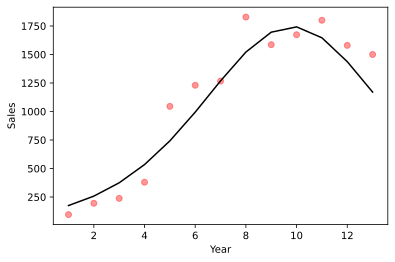

In [14]:
plt.xlabel('Year')
plt.ylabel('Sales')
plt.scatter(np.arange(1, len(s)+1), s, c='red', alpha=0.4)
plt.plot(np.arange(1, len(s)+1), f(best_sol[1], len(s)), 'k-')

## 参考资料

- 雷英杰.《MATLAB遗传算法工具箱及应用》, 西安电子科技大学出版社, 2015.
- [遗传算法入门详解](https://zhuanlan.zhihu.com/p/100337680)
- F. Bass. A new product growth for modelconsumer durables[J]. Management Science, 1969, 15(5):215-322.